**Question 1**

(a) Using the jupyter notebooks called graph_fourier_basic.ipynb and graph_fourier_guitar.ipynb to help you, calcuate the Fourier transform of this signal.

You should create plots of both the real and imaginary Fourier components as a function of frequency, a plot of the Fourier power spectrum as a function of frequency, and also a plot of the time spectrum using the Fourier components as compared to the original time spectrum.

(b) Discuss the resulting Fourier spectrum. Which Fourier components do you expect to be small (or zero), based on the theory? What is the Nyquist frequency, and how many terms in the Fourier series is necessary to give a good approximation to the original signal?

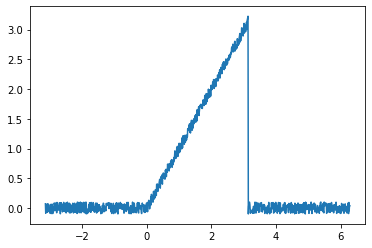

In [2]:
import numpy as np
from scipy.fftpack import fft
import scipy.stats as stats
import matplotlib.pyplot as plt
import random

N_samples = 1000
t_low = -np.pi
t_high = 2.0*np.pi

t = np.linspace(t_low,t_high,N_samples)
y = np.zeros(N_samples)

for i in range(N_samples):
    if t[i] < 0.0:
        y[i] = 0.0 + 0.1*random.uniform(-1,1)
    if t[i] >= 0.0 and t[i] < np.pi:
        y[i] = t[i] + 0.1*random.uniform(-1,1)
    if t[i] >= np.pi:
        y[i] = 0.0 + 0.1*random.uniform(-1,1)
    
plt.plot(t,y)

In [3]:
f_s = 0.2
N_cycles = 2.0
period = 1/f_s
T =  N_cycles*period
N_terms = int(N_samples/2)
dt = T/N_samples

twopiT=2.0*np.pi/T
epsilon = 0.000001

f = np.zeros(N_terms)

yhigh = np.zeros(1000)
ylow = np.zeros(1000)
time = np.zeros(1000)

ytReal = np.zeros(N_terms)
ytImag = np.zeros(N_terms)

yfftReal = np.zeros(N_terms)
yfftImag = np.zeros(N_terms)

power = np.zeros(N_terms)
powerfft = np.zeros(N_terms)

In [4]:
for i in range(N_samples):
    t[i]=i*dt
    y[i]=(1.0+0.00000002*random.uniform(-1,1))*np.sin(2.0*np.pi*t[i]*f_s)
    
for i in range(N_terms):
    f[i] = i/(N_terms*dt)

for n in range(N_terms):
    ytReal[n]=epsilon
    ytImag[n]=epsilon
    for i in range(N_samples):
        ytReal[n] = ytReal[n] + 2.0/T*y[i]*np.cos(twopiT*n*i*dt)*dt
        ytImag[n] = ytImag[n] + 2.0/T*y[i]*np.sin(twopiT*n*i*dt)*dt  
    power[n]=(ytReal[n]**2+ytImag[n]**2)

ymaxr = max(ytReal)
ymaxi = max(ytImag)
ymax = 1.2*max(ymaxr,ymaxi)

In [5]:
integral = 0.0
N_real = int(N_terms)

for n in range(N_real):
    integral = integral + power[n]
print("Average Power = %.2f Watts." % (integral/2.0))

f_nyquist = 0.5*(1.0/dt)
print("Nyquist frequency = %.2f Hz." % f_nyquist)

for i in range(1000):
    time[i] = i*T/1000.0
    ylow[i] = np.sin(2.0*np.pi*time[i]*f_s)
    yhigh[i] = -np.sin(2.0*np.pi*time[i]*(2.0*f_nyquist-f_s))

Average Power = 0.50 Watts.
Nyquist frequency = 50.00 Hz.


In [6]:
N_fft = len(y)
yfft = fft(y)
yfftReal = 2.0/N_fft*yfft.real
yfftImag = 2.0/N_fft*yfft.imag
powerfft = 4.0/N_fft**2*abs(yfft)**2

(-1.5, 1.5)

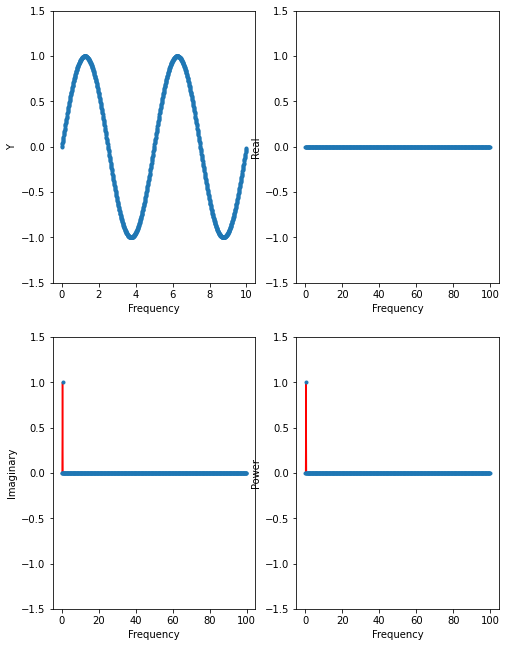

In [7]:
fig2, axs2 = plt.subplots(nrows=2, ncols=2, figsize=(8,11))

axs2[0,0].plot(t,y,'.-')
axs2[0,0].set_ylabel('Y')
axs2[0,0].set_xlabel('Frequency')
axs2[0,0].set_ylim(-1.5,1.5)

axs2[0,1].plot(f,yfftReal[0:N_terms],'r-')
axs2[0,1].plot(f,ytReal,'.')
axs2[0,1].set_ylabel('Real')
axs2[0,1].set_xlabel('Frequency')
axs2[0,1].set_ylim(-1.5,1.5)

axs2[1,0].plot(f,-yfftImag[0:N_terms],'r-')
axs2[1,0].plot(f,ytImag,'.')
axs2[1,0].set_ylabel('Imaginary')
axs2[1,0].set_xlabel('Frequency')
axs2[1,0].set_ylim(-1.5,1.5)

axs2[1,1].plot(f,powerfft[0:N_terms],'r-')
axs2[1,1].plot(f,power,'.')
axs2[1,1].set_ylabel('Power')
axs2[1,1].set_xlabel('Frequency')
axs2[1,1].set_ylim(-1.5,1.5)

(-1.2, 1.2)

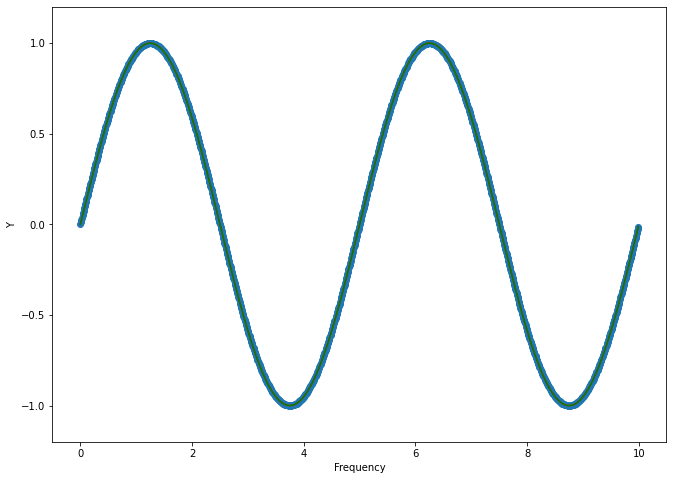

In [8]:
fig3, axs3 = plt.subplots(nrows=1, ncols=1, figsize=(11,8))

axs3.plot(t,y,'o')
axs3.plot(time,yhigh,'r-')
axs3.plot(time,ylow,'g-')
axs3.set_ylabel('Y')
axs3.set_xlabel('Frequency')
axs3.set_ylim(-1.2,1.2)

Discuss the resulting Fourier spectrum. Which Fourier components do you expect to be small (or zero), based on the theory? What is the Nyquist frequency, and how many terms in the Fourier series is necessary to give a good approximation to the original signal?


The smaller and negative values around zero on the original plot of the triangular pulse should be near zero in the fourier transform. A value is 0 in the fourier transform if it shows no variation over time, but since there is a small amount of noise in the original plot, these numbers will only be near zero. 

The Nyquist theorem is a method for converting continuous analog signals into discrete digitized signals. The Nyquist frequency is half the samples per second. 

1000 / (3pi) = 106.1 /2 = 53

Thus, only 53 terms are necessary for a good approximation of the original signal.

**Question 2**

Modify the Jupyter Notebook called frogger.ipynb to include the possibility that the frog can jump in either direction (not just forward). Use the following algorithm:

From wherever the frog is currently sitting (i.e. anywhere from the starting position to the last lily pad), it can jump to any other available position, including back to the starting position, or to the other side of the stream. The frog should continue jumping until that moment when it gets to the other side of the stream. The probability should be uniform/equal for jumping to any available position.

The goal here is to calculate the average number of jumps, as function of the number of lily pads.

Does the final result surprise you?

As a final check that your simulation is reasonable, plot the DISTRIBUTION of the number of jumps taken for N$_{lily~pads}$ = 30.

In [19]:
n = 10
start = 0
jumpsum = 0
total_jumps = 0
n_trys = 10 # 000

x = []
y = []
eval = []
evalr = []
evalr2 = []
evalr3 = []
sigma = []

In [20]:
for npad in range(1,n+1): 

    if (npad == 1):
        eval.append(1)
        evalr.append(1)
    else:
        sum = 0.0
        for i in range(1,npad):
            sum = sum + 1.0/npad*(1.0+eval[npad-i-1])
        sum = sum + 1.0/npad
        eval.append(sum)
        evalr.append(eval[npad-1])
    
    sum = 0.0
    for i in range(1,npad+1):
        sum = sum + 1.0/i
    evalr2.append(sum)
    x.append(npad)
    
    sum2 = 1.0/stats.hmean(x)*npad
    evalr3.append(sum2)
        
    end = npad
    for j in range(n_trys):
        while start < npad:
            # MAKE CHANGES HERE 
            jump = 0 
            while jump==0:
              jump = int(random.uniform(-(start),(end-start+1)))
            start = start + jump
            # END
            jumpsum = jumpsum + 1
        start = 0
        total_jumps = total_jumps + jumpsum
        jumpsum = 0
    
    expectation_value = total_jumps/n_trys*1.0
    y.append(expectation_value)
    sigma.append(expectation_value*1/np.sqrt(n_trys))
    total_jumps = 0
    
    print ("Expectation value for n = %d is %f" % (npad,expectation_value))

Expectation value for n = 1 is 1.000000
Expectation value for n = 2 is 1.600000
Expectation value for n = 3 is 2.300000
Expectation value for n = 4 is 4.500000
Expectation value for n = 5 is 3.900000
Expectation value for n = 6 is 6.500000
Expectation value for n = 7 is 5.900000
Expectation value for n = 8 is 7.400000
Expectation value for n = 9 is 6.600000
Expectation value for n = 10 is 11.300000


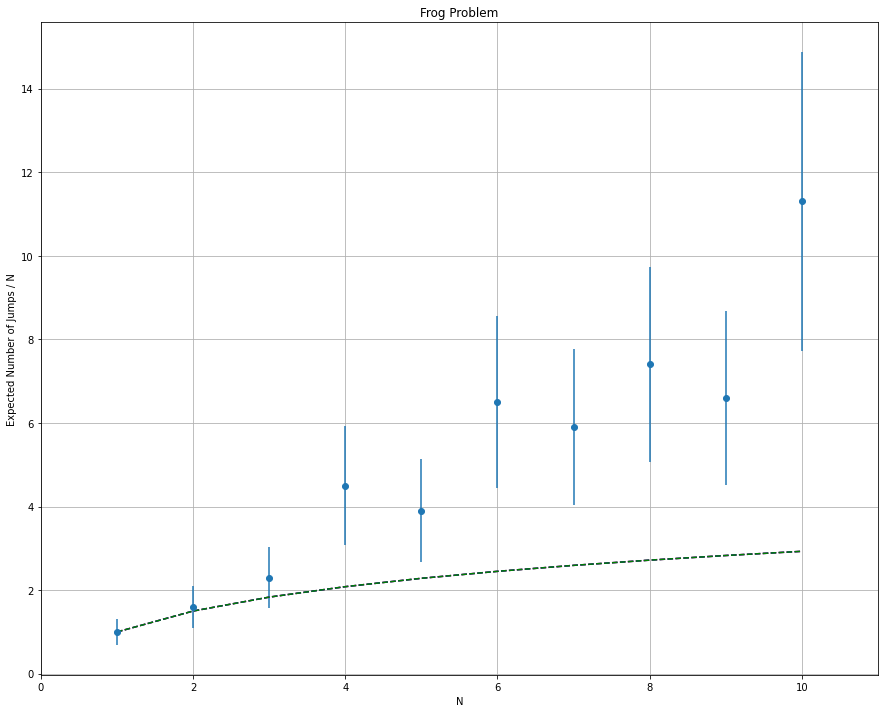

In [21]:
def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x+paramlist[2]*x*x+paramlist[3]*x*x*x


fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

ax1.set_title("Frog Problem")
ax1.set_xlabel('N')
ax1.set_ylabel('Expected Number of Jumps / N')
ax1.set_xlim(0,n+1)
ax1.grid(True)

ax1.errorbar(x,y,yerr=sigma,fmt='o')
ax1.plot(x,evalr,'r--')
ax1.plot(x,evalr2,'b--')
ax1.plot(x,evalr3,'g--')
#  "Average number of hops by number of lily pads"

Does the final result surprise you?

I'm not surprised that allowing jumps backwards makes nigher npad values average a higher number of jumps, but I was surpirsed at the rate at which this changes. With forward-only jumps, the rate of increase of average hops was far lower than the rate of increase when backward hops are allowed. I'm also surprised at the large error bars on the data points.

As a final check that your simulation is reasonable, plot the DISTRIBUTION of the number of jumps taken for N$_{lily~pads}$ = 30.

Expectation value for n = 30 is 29.582800


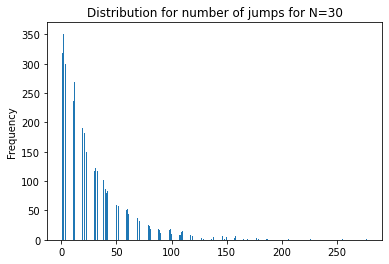

In [41]:
npad = 30
start = 0
jumpsum = 0
total_jumps = 0
n_trys = 10000

x = []
y = []
attempts = []

end = npad
for j in range(n_trys):
    while start < npad:
        # MAKE CHANGES HERE 
        jump = 0 
        while jump==0:
          jump = int(random.uniform(-(start),(end-start+1)))
        start = start + jump
        # END
        jumpsum = jumpsum + 1
    start = 0
    total_jumps = total_jumps + jumpsum
    attempts.append(jumpsum)
    jumpsum = 0
  
expectation_value = total_jumps/n_trys*1.0
y.append(expectation_value)
sigma.append(expectation_value*1/np.sqrt(n_trys))
total_jumps = 0

print ("Expectation value for n = %d is %f" % (npad,expectation_value))
plt.hist(attempts, bins=1000)
plt.gca().set(title='Distribution for number of jumps for N=30', ylabel='Frequency');

**Question 3**

Begin with the example Jupyter Notebook called drunken_sailor.ipynb

In the first example, we considered random walk in one dimension. For each step that a sailor took, we sampled from a random Gaussian distribution with a mean value of 0 and a standard deviation of 1.

In this question, we would like to consider a different underlying distribution for the step size. Instead of using a Gaussian, choose the step size from a Poisson distribution with an average value of 1. Remember that the Poisson distribution is defined for positive values of $x$ only, and so you will also have to randomly choose the direction of the step.

How do the results compare to choosing a Gaussian distribution of step size? Do your results agree with the predictions of the central limit theorem?

Text(0, 0.5, 'p(x)')

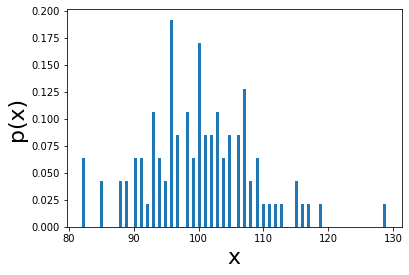

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from math import erfc

def walkn(nsteps): 
  # Use Poisson instead of Gaussian
  r = stats.poisson.rvs(mu=1, size=nsteps)
  r_modified = []
  for i in r:
    if random.random() < 0.5:
      r_modified.append(-i)
    else:
      r_modified.append(i)
  return np.sum(r)
  
def npart_walkn(npart,nsteps):
  xvec = np.zeros(0)
  for i in range(npart):
      x = walkn(nsteps)  # a single random walk value
      xvec = np.append(xvec,x)
  return xvec

nsteps = 100 # number of steps
npart = 100 # number of particles (sailors) to let walk around
xvec = npart_walkn(npart,nsteps)

n, bins, patches = plt.hist(xvec,bins=100,density=True)
plt.xlabel("x",fontsize=22)
plt.ylabel("p(x)",fontsize=22)

Text(0, 0.5, 'p(x)')

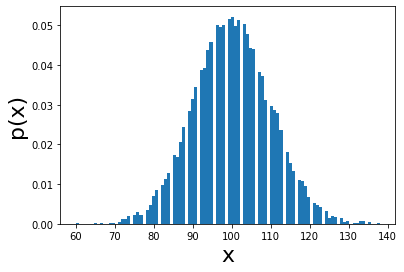

In [146]:
nsteps = 100 # number of steps
npart = 10000 # number of particles (sailors) to let walk around
xvec = npart_walkn(npart,nsteps)

n, bins, patches = plt.hist(xvec,bins=100,density=True)
plt.xlabel("x",fontsize=22)
plt.ylabel("p(x)",fontsize=22)



How do the results compare to choosing a Gaussian distribution of step size? Do your results agree with the predictions of the central limit theorem?

The results are not that different. The graph appears different because the step values resulting from Poisson are discrete and do not include decimal values. But the curves created by the graphs are fairly similar. They both approach a normal distribution. This is easier to see with a larger sample size (the first graph has a sample size of 100, the second has a sample size of 10000).

Even though the Poisson data was not calculated with a normal distribution, the frequency of occurences for step values approaches a normal distribution when the sample size is large enough. This is congruent with the cental limit theorem.